In [3]:
import pandas as pd
import os 
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Задание 2.2.

In [4]:
students = np.array(["John Davis", "Angela Williams", "Bullwinkie Moose", "David Jones", "Janice Markhammer",
                              "Cheryl Cushing", "Reuven Ytzrhak", "Grek Knox", "Joel England", "Mary Rayburn"])
math = np.array([502, 600, 412, 358, 495, 512, 410,
                          625, 573, 522])
nat = np.array([95, 99, 80, 82, 75, 85,
                         80, 95, 89, 86])
eng = np.array([25, 22, 18, 15, 20, 28,
                          15, 30, 27, 18])
df = pd.DataFrame({"Студенты": students,
                   "Фамилия": pd.Series([None] * len(students)),
                   "Имя": pd.Series([None] * len(students)),
                  "Математика": math,
                  "Естественные науки": nat,
                  "Английский язык": eng},  index=None)
df

,Студенты,Фамилия,Имя,Математика,Естественные науки,Английский язык
0,John Davis,None,None,502,95,25
1,Angela Williams,None,None,600,99,22
2,Bullwinkie Moose,None,None,412,80,18
3,David Jones,None,None,358,82,15
4,Janice Markhammer,None,None,495,75,20
5,Cheryl Cushing,None,None,512,85,28
6,Reuven Ytzrhak,None,None,410,80,15
7,Grek Knox,None,None,625,95,30
8,Joel England,None,None,573,89,27
9,Mary Rayburn,None,None,522,86,18


Добавим зачения в столбцы "Фамилия" и "Имя".

In [5]:
df[["Имя", "Фамилия"]] = df["Студенты"].str.split(" ", expand = True)
df = df.drop(["Студенты"], axis=1)
df

,Фамилия,Имя,Математика,Естественные науки,Английский язык
0,Davis,John,502,95,25
1,Williams,Angela,600,99,22
2,Moose,Bullwinkie,412,80,18
3,Jones,David,358,82,15
4,Markhammer,Janice,495,75,20
5,Cushing,Cheryl,512,85,28
6,Ytzrhak,Reuven,410,80,15
7,Knox,Grek,625,95,30
8,England,Joel,573,89,27
9,Rayburn,Mary,522,86,18


Проведем стандартизацию столбцов "Математика", "Естественные науки", "Английский язык".

In [6]:
stand = preprocessing.MinMaxScaler()
scaled = stand.fit_transform(df[["Математика", "Естественные науки", "Английский язык"]])
df[["Математика", "Естественные науки", "Английский язык"]] = scaled
df

,Фамилия,Имя,Математика,Естественные науки,Английский язык
0,Davis,John,0.539326,0.833333,0.666667
1,Williams,Angela,0.906367,1.000000,0.466667
2,Moose,Bullwinkie,0.202247,0.208333,0.200000
3,Jones,David,0.000000,0.291667,0.000000
4,Markhammer,Janice,0.513109,0.000000,0.333333
5,Cushing,Cheryl,0.576779,0.416667,0.866667
6,Ytzrhak,Reuven,0.194757,0.208333,0.000000
7,Knox,Grek,1.000000,0.833333,1.000000
8,England,Joel,0.805243,0.583333,0.800000
9,Rayburn,Mary,0.614232,0.458333,0.200000


Вычислим средний стандартизованный балл для каждого студента.

In [7]:
df["Средний балл"] = df[["Математика","Естественные науки","Английский язык"]].mean(axis = 1)
df

,Фамилия,Имя,Математика,Естественные науки,Английский язык,Средний балл
0,Davis,John,0.539326,0.833333,0.666667,0.679775
1,Williams,Angela,0.906367,1.000000,0.466667,0.791011
2,Moose,Bullwinkie,0.202247,0.208333,0.200000,0.203527
3,Jones,David,0.000000,0.291667,0.000000,0.097222
4,Markhammer,Janice,0.513109,0.000000,0.333333,0.282147
5,Cushing,Cheryl,0.576779,0.416667,0.866667,0.620037
6,Ytzrhak,Reuven,0.194757,0.208333,0.000000,0.134363
7,Knox,Grek,1.000000,0.833333,1.000000,0.944444
8,England,Joel,0.805243,0.583333,0.800000,0.729526
9,Rayburn,Mary,0.614232,0.458333,0.200000,0.424189


Присвоим каждому студенту оценку по системе А-B-C-D-F.

In [8]:
df["Оценка A-B-C-D-F"] = None
df.loc[0.8 < df["Средний балл"], "Оценка A-B-C-D-F"] = "A"
df.loc[(0.6 < df["Средний балл"]) & (df["Средний балл"] <= 0.8), "Оценка A-B-C-D-F"] = "B"
df.loc[(0.4 < df["Средний балл"]) & (df["Средний балл"] <= 0.6), "Оценка A-B-C-D-F"] = "C"
df.loc[(0.2 < df["Средний балл"]) & (df["Средний балл"] <= 0.4), "Оценка A-B-C-D-F"] = "D"
df.loc[df["Средний балл"] <= 0.2, "Оценка A-B-C-D-F"] = "F"
df

,Фамилия,Имя,Математика,Естественные науки,Английский язык,Средний балл,Оценка A-B-C-D-F
0,Davis,John,0.539326,0.833333,0.666667,0.679775,B
1,Williams,Angela,0.906367,1.000000,0.466667,0.791011,B
2,Moose,Bullwinkie,0.202247,0.208333,0.200000,0.203527,D
3,Jones,David,0.000000,0.291667,0.000000,0.097222,F
4,Markhammer,Janice,0.513109,0.000000,0.333333,0.282147,D
5,Cushing,Cheryl,0.576779,0.416667,0.866667,0.620037,B
6,Ytzrhak,Reuven,0.194757,0.208333,0.000000,0.134363,F
7,Knox,Grek,1.000000,0.833333,1.000000,0.944444,A
8,England,Joel,0.805243,0.583333,0.800000,0.729526,B
9,Rayburn,Mary,0.614232,0.458333,0.200000,0.424189,C


Выведем данные о всех студентах, получивших оценку F.

In [9]:
df[df["Оценка A-B-C-D-F"] == "F"]

,Фамилия,Имя,Математика,Естественные науки,Английский язык,Средний балл,Оценка A-B-C-D-F
3,Jones,David,0.000000,0.291667,0.0,0.097222,F
6,Ytzrhak,Reuven,0.194757,0.208333,0.0,0.134363,F


Выведем имена студентов, получивших оценку А.

In [10]:
df[df["Оценка A-B-C-D-F"] == "A"]["Имя"]

7    Grek
Name: Имя, dtype: object

Посчитаем, сколько студентов получили оценку ниже С.

In [11]:
len(df[df["Оценка A-B-C-D-F"].isin(["D", "F"])])

4

Выполним визуализацию оценок для А-F.

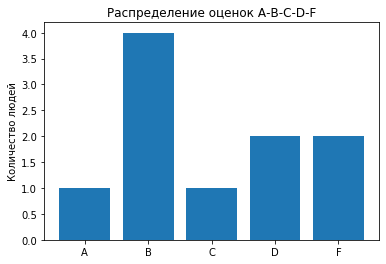

In [12]:
rating = ['A', 'B', 'C', 'D', 'F']
nums = [len(df[df["Оценка A-B-C-D-F"] == char]) for char in rating]
plt.bar(rating, nums)
plt.title('Распределение оценок A-B-C-D-F')
plt.ylabel('Количество людей')
plt.show()

Узнаем, есть ли студенты, получившие оценку Е.

In [13]:
df[df["Оценка A-B-C-D-F"] == "E"]

,Фамилия,Имя,Математика,Естественные науки,Английский язык,Средний балл,Оценка A-B-C-D-F


Отсортируем строки по фамилии студентов, а затем по имени.

In [14]:
df.sort_values(by=["Фамилия", "Имя"])

,Фамилия,Имя,Математика,Естественные науки,Английский язык,Средний балл,Оценка A-B-C-D-F
5,Cushing,Cheryl,0.576779,0.416667,0.866667,0.620037,B
0,Davis,John,0.539326,0.833333,0.666667,0.679775,B
8,England,Joel,0.805243,0.583333,0.800000,0.729526,B
3,Jones,David,0.000000,0.291667,0.000000,0.097222,F
7,Knox,Grek,1.000000,0.833333,1.000000,0.944444,A
4,Markhammer,Janice,0.513109,0.000000,0.333333,0.282147,D
2,Moose,Bullwinkie,0.202247,0.208333,0.200000,0.203527,D
9,Rayburn,Mary,0.614232,0.458333,0.200000,0.424189,C
1,Williams,Angela,0.906367,1.000000,0.466667,0.791011,B
6,Ytzrhak,Reuven,0.194757,0.208333,0.000000,0.134363,F


# Задание 2.3.

In [15]:
# Сгенерируйте последовательность Доклад  оклад  клад  лад  ад
word = "Доклад"
np.array([word[i:] for i in range(len(word) - 1)])

array(['Доклад', 'оклад', 'клад', 'лад', 'ад'], dtype='<U6')